<h1>Temat projektu: Ilość mieszkańców a wyniki matury w latach 2010-2023</h1>
<h2>Anton Prykhodzka 248662</h2>

In [13]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
from IPython.display import HTML

<h3>1. Przygotowanie danych</h3>

In [ ]:
matura_file = "liczba_osob_ktore_przystapily_lub_zdaly_egzamin_maturalny.xlsx"
df_matura = pd.read_excel(matura_file, sheet_name="dane")

population_files = glob.glob("*.xlsx")
df_population_list = []

for file in population_files:
    if "liczba_osob_ktore_przystapily_lub_zdaly_egzamin_maturalny" in file or file.startswith("~$"):
        continue
    year = int(file.split(".")[0])
    df = pd.read_excel(file, sheet_name="Tab 1", skiprows=8)
    df = df.rename(columns={df.columns[0]: "Województwo", df.columns[1]: "Populacja", df.columns[2]: "Mężczyźni", df.columns[3]: "Kobiety"})
    df = df.drop(df.columns[4:10], axis=1)
    df["Rok"] = year
    df_population_list.append(df)

df_population = pd.concat(df_population_list, ignore_index=True)
df_population_filtered = df_population[df_population['Województwo'] != 'P o l s k a']
df_population_filtered = df_population_filtered.dropna(subset=['Województwo','Populacja'])

df_matura_filtered_zdalo = df_matura[df_matura['status_zdajacych'] == 'zdało']
df_matura_grouped_zdalo = df_matura_filtered_zdalo.groupby(['rok', 'wojewodztwo', 'plec'])['wartosc'].sum().reset_index()

df_merged_zdalo = pd.merge(df_matura_grouped_zdalo, df_population_filtered, left_on=['rok', 'wojewodztwo'], right_on=['Rok', 'Województwo'])
df_merged_zdalo = df_merged_zdalo.rename(columns={'wartosc': 'liczba_osób'})

<h2>2. Wykresy</h2>

In [15]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.subplots_adjust(bottom=0.3)

def update(year):
    ax.clear()
    data = df_population_filtered[df_population_filtered['Rok'] == year]
    sns.barplot(x='Województwo', y='Populacja', data=data, ax=ax, hue='Województwo', dodge=False, palette='viridis', legend=False)
    ax.set_xticklabels(data['Województwo'].unique(), rotation=90, ha='right', va='center', rotation_mode='anchor')
    ax.set_title(f'Populacja w województwach w roku {year}')
    ax.set_xlabel('Województwo')
    ax.set_ylabel('Populacja')
    ax.set_ylim(0, df_population_filtered['Populacja'].max())
    plt.tight_layout()

ani = animation.FuncAnimation(fig, update, frames=range(2010, 2024), repeat=True)

plt.close()

HTML(ani.to_jshtml())

C:\Users\prikh\AppData\Local\Temp\ipykernel_23788\927353640.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(data['Województwo'].unique(), rotation=90, ha='right', va='center', rotation_mode='anchor')
C:\Users\prikh\AppData\Local\Temp\ipykernel_23788\927353640.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(data['Województwo'].unique(), rotation=90, ha='right', va='center', rotation_mode='anchor')
C:\Users\prikh\AppData\Local\Temp\ipykernel_23788\927353640.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(data['Województwo'].unique(), rotation=90, ha='right', va='center', rotation_mode='anchor')
C:\Users\prikh\AppData\Local\Temp\ipykernel_23788\927353640.py:8: UserWarning: 

<Figure size 640x480 with 0 Axes>

Województwo Mazowieckie ma najwyższą populację w Polsce, a następnie Śląskie i Wielkopolskie.
<br>Najmniej zaludnione są województwa takie jak Lubuskie, Opolskie i Świętokrzyskie.
<br>Rozkład populacji nie jest równy, co oznacza, że bardziej zaludnione województwa mogą mieć większy wpływ na ogólnopolskie statystyki dotyczące edukacji, np. liczbę osób przystępujących do matury.

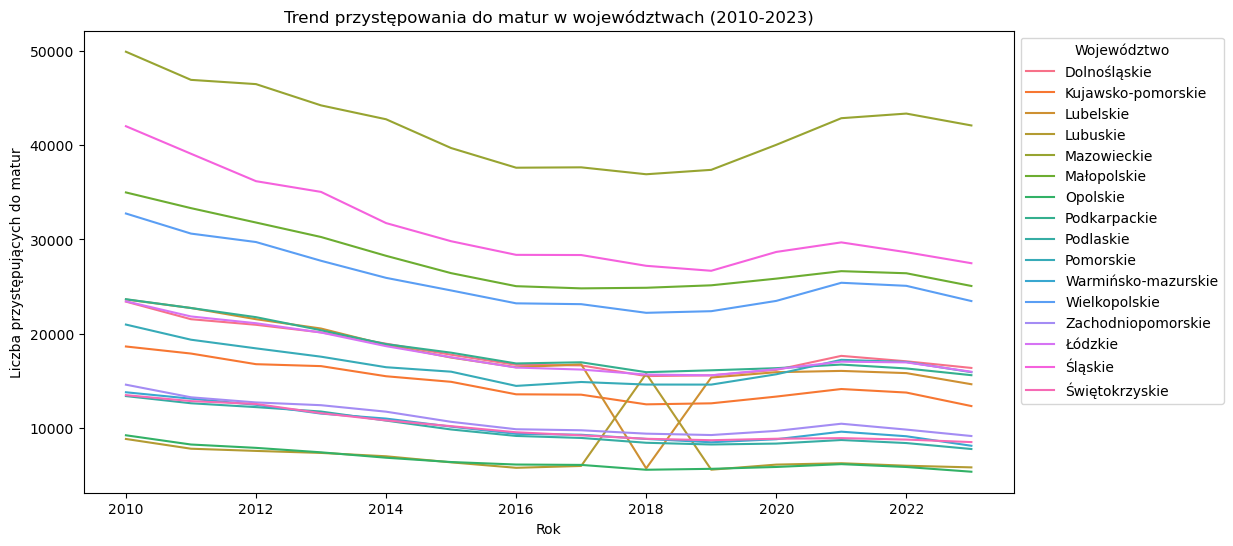

In [19]:
df_matura_przystapilo = df_matura[df_matura['status_zdajacych'] == 'przystąpiło']

df_matura_grouped_przystapilo = df_matura_przystapilo.groupby(['rok', 'wojewodztwo'])['wartosc'].sum().reset_index()

df_merged_przystapilo = pd.merge(df_matura_grouped_przystapilo, df_population_filtered, 
                                 left_on=['rok', 'wojewodztwo'], right_on=['Rok', 'Województwo'])

df_merged_przystapilo = df_merged_przystapilo.rename(columns={'wartosc': 'liczba_przystępujących'})

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_merged_przystapilo, x="rok", y="liczba_przystępujących", hue="wojewodztwo")
plt.xlabel("Rok")
plt.ylabel("Liczba przystępujących do matur")
plt.title("Trend przystępowania do matur w województwach (2010-2023)")
plt.legend(title="Województwo", bbox_to_anchor=(1, 1))
plt.show()

Trend w większości województw jest malejący – liczba osób przystępujących do matury spada w latach 2010-2023.
<br>Województwo Mazowieckie i Śląskie mają najwyższą liczbę maturzystów, co jest zgodne z ich wysoką populacją.
<br>Województwa o najmniejszej populacji, takie jak Opolskie czy Lubuskie, mają również najmniejszą liczbę przystępujących do matury.
<br>W niektórych latach można zauważyć niewielkie wzrosty, ale ogólnie dominująca tendencja jest spadkowa, co może wskazywać na zmniejszającą się liczbę młodzieży w wieku maturalnym.


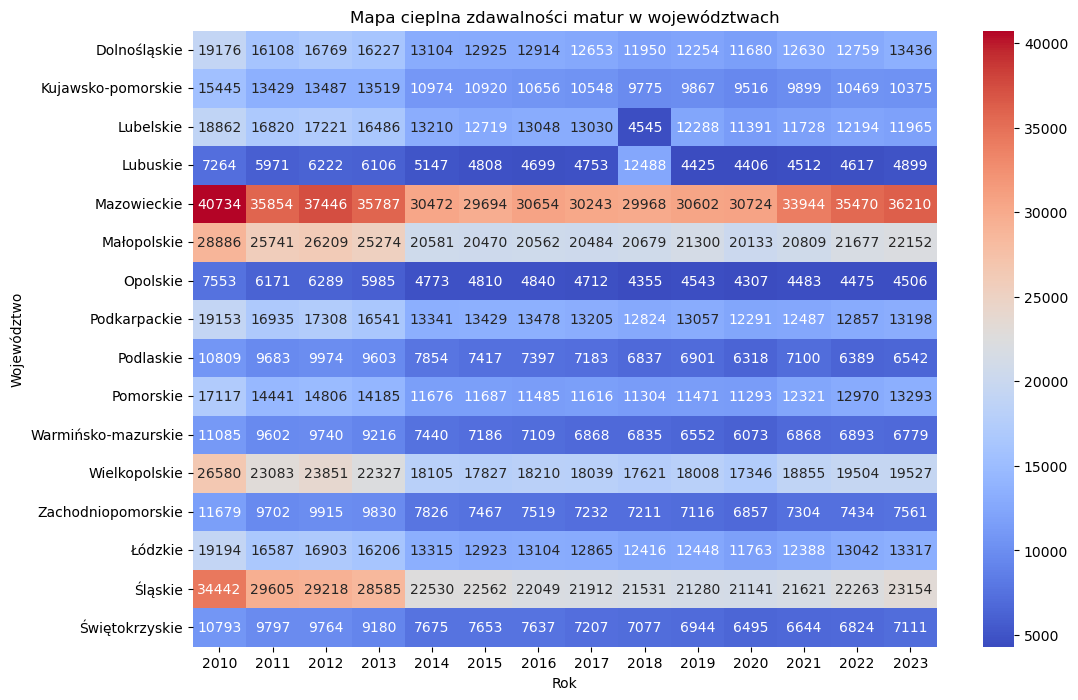

In [17]:
pivot_table = df_merged_zdalo.pivot_table(index='wojewodztwo', columns='rok', values='liczba_osób', aggfunc='sum')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt='.0f')
plt.xlabel("Rok")
plt.ylabel("Województwo")
plt.title("Mapa cieplna zdawalności matur w województwach")
plt.show()

Województwo Mazowieckie osiąga najwyższe wartości w liczbie zdanych matur każdego roku, co jest zgodne z liczbą przystępujących i wysoką populacją.
<br>W województwach o niższej populacji (np. Opolskie, Lubuskie) liczba zdanych matur jest również stosunkowo niska.
<br>Widać wyraźne różnice między województwami – Mazowieckie i Śląskie mają przewagę nad pozostałymi regionami.
<br>Ogólna liczba zdanych matur w większości województw zmniejsza się w czasie, co koreluje z trendem spadku liczby przystępujących do matury.

In [ ]:
df_population_filtered['Województwo'] = df_population_filtered['Województwo'].astype(str)

df_population_melted = pd.melt(df_population_filtered, id_vars=['Województwo', 'Rok'], 
                                value_vars=['Mężczyźni', 'Kobiety'], 
                                var_name='Płeć', value_name='Liczba_osób')

custom_palette = {"kobiety": "orange", "mężczyźni": "blue"}

fig, ax = plt.subplots(figsize=(12, 6))

unique_wojewodztwa = df_population_melted['Województwo'].unique()

def update(wojewodztwo):
    ax.clear()
    data = df_population_melted[df_population_melted['Województwo'] == wojewodztwo]
    sns.kdeplot(data=data, x='Rok', y='Liczba_osób', hue='Płeć', fill=True, ax=ax)
    ax.set_title(f"Populacja mężczyzn i kobiet w województwie {wojewodztwo} w latach 2010-2023")
    ax.set_xlabel("Rok")
    ax.set_ylabel("Liczba osób")
    plt.tight_layout()

ani = animation.FuncAnimation(fig, update, frames=unique_wojewodztwa, repeat=True)

plt.close()
HTML(ani.to_jshtml())

c:\Users\prikh\anaconda3\Lib\site-packages\seaborn\distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'custom_palette'
  cset = contour_func(
c:\Users\prikh\anaconda3\Lib\site-packages\seaborn\distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'custom_palette'
  cset = contour_func(
c:\Users\prikh\anaconda3\Lib\site-packages\seaborn\distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'custom_palette'
  cset = contour_func(
c:\Users\prikh\anaconda3\Lib\site-packages\seaborn\distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'custom_palette'
  cset = contour_func(
c:\Users\prikh\anaconda3\Lib\site-packages\seaborn\distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'custom_palette'
  cset = contour_func(
c:\Users\prikh\anaconda3\Lib\site-packages\seaborn\distributions.py:1176: UserWarning: The following kwargs were not used by conto

<Figure size 640x480 with 0 Axes>

Populacja kobiet (pomarańczowy) jest większa niż populacja mężczyzn (niebieski) – to zjawisko zgodne z ogólnymi danymi demograficznymi, ponieważ kobiety statystycznie żyją dłużej.
<br>W czterech województwach obserwuje się lekki wzrost populacji(Małopolskie, Mazowieckie, Pomorskie, Wielkopolskie), w pozostałych spad

In [20]:
fig, ax = plt.subplots(figsize=(12, 6))

unique_wojewodztwa = df_merged_zdalo['wojewodztwo'].unique()

custom_palette = {"kobiety": "orange", "mężczyźni": "blue"}

def update(wojewodztwo):
    ax.clear()
    data = df_merged_zdalo[df_merged_zdalo['wojewodztwo'] == wojewodztwo]
    sns.stripplot(x='rok', y='liczba_osób', hue='plec', data=data, dodge=True, jitter=True, ax=ax, palette=custom_palette)
    ax.set_title(f"Rozkład liczby zdanych matur w województwie {wojewodztwo} według płci")
    ax.set_xlabel("Rok")
    ax.set_ylabel("Liczba zdanych matur")
    ax.legend(title="Płeć", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()

ani = animation.FuncAnimation(fig, update, frames=unique_wojewodztwa, repeat=True)
plt.close()
HTML(ani.to_jshtml())

<Figure size 640x480 with 0 Axes>

Liczba kobiet zdających matury jest większa niż liczba mężczyzn, co jest zgodne z trendem ogólnej populacji kobiet.
<br>Tu na wszystkich wykresach obserwuje się spad, nawet w tych województwach, w których obserwowany był wzrost

<h2>3. Wnioski</h2>

Województwa o największej populacji, takie jak Mazowieckie, Śląskie i Wielkopolskie, mają zdecydowanie wyższą liczbę przystępujących do matury oraz zdających maturę. Wynika to z większej liczby osób w wieku maturalnym, ale także z większych zasobów edukacyjnych w tych regionach.
W województwach mniej zaludnionych, jak Lubuskie, Opolskie i Świętokrzyskie, liczba przystępujących do matury jest znacznie niższa, co odzwierciedla rozkład populacji i ograniczony dostęp do dużych ośrodków edukacyjnych.
<br>Ogólnopolski trend spadkowy w liczbie przystępujących do matury i zdających maturę jest widoczny we wszystkich województwach, niezależnie od ich wielkości.
Spadek ten jest związany głównie z niżem demograficznym, co oznacza zmniejszenie liczby młodzieży w wieku maturalnym.
Dodatkowymi czynnikami mogą być emigracja młodzieży (zarówno wewnętrzna, jak i zagraniczna),
zmiana preferencji edukacyjnych (np. wzrost popularności szkół zawodowych i techników).
<br>
W każdym województwie kobiety przeważają liczebnie w liczbie zdających maturę w porównaniu do mężczyzn, co jest zgodne z ich wyższą liczebnością w populacji, a także może wskazywać na różnice w podejściu do edukacji.
Większy odsetek kobiet zdających maturę może być wynikiem wyższego zaangażowania w edukację,
większej liczby kobiet kończących szkoły średnie,
potencjalnych różnic w wyborach życiowych mężczyzn, np. wcześniejsze podjęcie pracy lub wybór ścieżki zawodowej.
<br>
Różnice w liczbie zdanych matur między województwami nie wynikają tylko z liczby ludności, ale także z dostępu do edukacji (liczba szkół, poziom nauczania),
lokacji większych miast akademickich (np. Warszawa, Kraków, Poznań), które skupiają więcej osób dążących do wykształcenia.
Województwa z lepszym dostępem do edukacji (np. Mazowieckie, Małopolskie) mogą lepiej radzić sobie z niżem demograficznym niż regiony z ograniczonymi zasobami edukacyjnymi (np. Lubuskie, Opolskie).


<h2>UWAGA</h2>

Zauważyłem możliwy błąd w pliku z danymi o zdanej maturze konkretnie dane zdanych matur w 2018 roku w województwach Lubelskim i Lubuskim. Moim zdaniem ich zmienili miejscami

<h2>4. Źródła danych</h2>

Wszystkie pliki z danymi o ludności zostały pobrane z GUS: https://demografia.stat.gov.pl/bazademografia/ (dalej klikamy "Wyniki badań bieżących" i zatem "Ludność")
<br>Plik z danymi o zdanych maturach został pobrany z GUS: https://stat.gov.pl/obszary-tematyczne/edukacja/edukacja/liczba-osob-ktore-przystapilyzdaly-egzamin-maturalny,15,1.html